# Évolution des sondages pour la présidentielle française de 2022

In [22]:
import pandas as pd
import datetime
z=pd.read_csv("https://github.com/nsppolls/nsppolls/raw/master/presidentielle.csv")
#display(z)
z["date"]=pd.to_datetime(z.fin_enquete)
z1=z[z.tour=="Premier tour"][["date","candidat","intentions"]]
z1=pd.pivot_table(z1, index=['date'], columns='candidat', values='intentions') # mise en forme
z1=z1.reset_index()

In [23]:
liste_retenue=['Anne Hidalgo', 'Emmanuel Macron','Eric Zemmour', 'Fabien Roussel', 'Jean Lassalle','Jean-Luc Mélenchon', 'Marine Le Pen','Nathalie Arthaud', 'Nicolas Dupont-Aignan', 'Philippe Poutou', 'Valérie Pécresse', 'Yannick Jadot']
len(liste_retenue)

12

In [24]:
z1=z1[z1.date>datetime.datetime(2022,1,1)].set_index("date")
z1=z1[liste_retenue]
z1['tot']=z1.sum(axis=1)
# renormalisation pour les seuls retenus
for c in z1.columns:
    if c=='tot':
        continue
    z1[c]=z1[c]/z1.tot*100

In [25]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)    
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

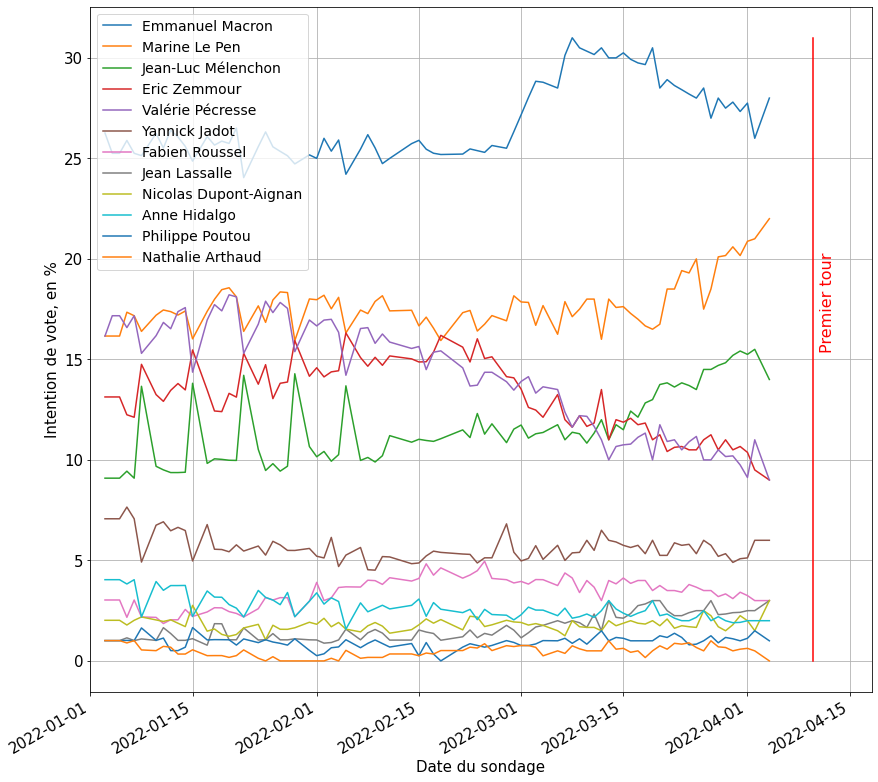

In [37]:
# ordonnancement en fonction des dernières intensions de vote
liste_ordonnee=list(z1[z1.index==z1.index.max()][liste_retenue].transpose().sort_values(by=z1.index.max(),ascending=False).index)

ax=z1[liste_ordonnee].plot(figsize=(14,14))
ax.legend(loc='upper left')

ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')

ax.set_xlim(datetime.datetime(2022,1,1),datetime.datetime(2022,4,18))
date_scrutin=datetime.datetime(2022,4,10)
maxn=z1[liste_ordonnee[0]].max()
ax.plot([date_scrutin,date_scrutin],[0,maxn],'r-')
ax.text(date_scrutin+datetime.timedelta(days=1),maxn/2,'Premier tour',rotation='vertical',color='red',fontsize=16)

ax.grid()

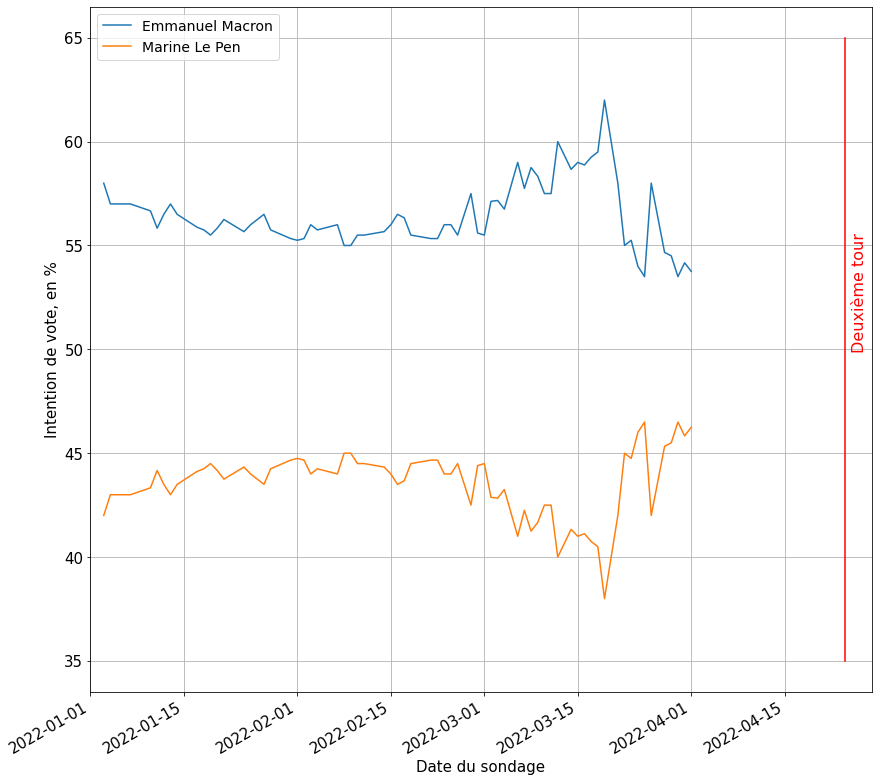

In [56]:
z2=z[(z.tour=="Deuxième tour") & (z.hypothese=="Hypothèse Macron / Le Pen")][["date","candidat","intentions"]]
z2=pd.pivot_table(z2, index=['date'], columns='candidat', values='intentions') # mise en forme
z2=z2.reset_index()

z2=z2[z2.date>datetime.datetime(2022,1,1)].set_index("date")

# ordonnancement en fonction des dernières intensions de vote
liste_ordonnee=list(z2[z2.index==z2.index.max()].transpose().sort_values(by=z2.index.max(),ascending=False).index)

ax=z2[liste_ordonnee].plot(figsize=(14,14))
ax.legend(loc='upper left')

ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')

ax.set_xlim(datetime.datetime(2022,1,1),datetime.datetime(2022,4,28))
date_scrutin_2=datetime.datetime(2022,4,24)
maxn2=z2[z2.columns[0]].max()
minn2=z2[z2.columns[0]].min()
ax.plot([date_scrutin_2,date_scrutin_2],[35,65],'r-')
ax.text(date_scrutin_2+datetime.timedelta(days=1),50,'Deuxième tour',rotation='vertical',color='red',fontsize=16)

ax.grid()

In [48]:
z2.columns[0]

'Emmanuel Macron'

In [46]:
z2.max()

candidat
Emmanuel Macron    62.0
Marine Le Pen      46.5
dtype: float64

In [35]:
z2

,candidat,parti,intentions,erreur_sup,erreur_inf,id,nom_institut,commanditaire,debut_enquete,fin_enquete,echantillon,population,rolling,media,tour,hypothese,sous_echantillon,date
15,Emmanuel Macron,LRM,57.0,59.9936,54.0064,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Deuxième tour,Hypothèse Macron / Le Pen,1050.700,2022-01-05
16,Marine Le Pen,Rassemblement national,43.0,45.9936,40.0064,20220102_0105r_ow,Opinion Way,"Les Echos, Radio Classique, Kea Partners",2022-01-02,2022-01-05,1501,Inscrits sur les listes électorales,True,True,Deuxième tour,Hypothèse Macron / Le Pen,1050.700,2022-01-05
31,Marine Le Pen,Rassemblement national,45.0,47.3267,42.6733,20220225_0228_hi,Harris Interactive,Challenges,2022-02-25,2022-02-28,2311,Inscrits sur les listes électorales,False,True,Deuxième tour,Hypothèse Macron / Le Pen,1756.360,2022-02-28
32,Emmanuel Macron,LRM,55.0,57.3267,52.6733,20220225_0228_hi,Harris Interactive,Challenges,2022-02-25,2022-02-28,2311,Inscrits sur les listes électorales,False,True,Deuxième tour,Hypothèse Macron / Le Pen,1756.360,2022-02-28
118,Emmanuel Macron,LRM,60.0,63.5055,56.4945,20220310_0314r_ips,Ipsos,"Le Parisien, France Info",2022-03-10,2022-03-14,915,Certains d'aller voter,True,True,Deuxième tour,Hypothèse Macron / Le Pen,750.300,2022-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,Marine Le Pen,Rassemblement national,39.0,42.4855,35.5145,20220317_0321r_ips,Ipsos,"Le Parisien, France Info",2022-03-17,2022-03-21,977,Certains d'aller voter,True,True,Deuxième tour,Hypothèse Macron / Le Pen,752.290,2022-03-21
8232,Emmanuel Macron,LRM,55.0,58.2218,51.7782,20220204_0208r_ifp,Ifop,"Paris Match, LCI, Sud Radio",2022-02-04,2022-02-08,1351,Inscrits sur les listes électorales,True,True,Deuxième tour,Hypothèse Macron / Le Pen,915.978,2022-02-08
8233,Marine Le Pen,Rassemblement national,45.0,48.2218,41.7782,20220204_0208r_ifp,Ifop,"Paris Match, LCI, Sud Radio",2022-02-04,2022-02-08,1351,Inscrits sur les listes électorales,True,True,Deuxième tour,Hypothèse Macron / Le Pen,915.978,2022-02-08
8255,Emmanuel Macron,LRM,58.0,61.1928,54.8072,20220315_0316_bva,BVA,"RTL, Orange",2022-03-15,2022-03-16,1106,Certains d'aller voter,False,True,Deuxième tour,Hypothèse Macron / Le Pen,917.980,2022-03-16
